In [1]:
import numpy as np
import pandas as pd
import math
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA
from scipy.stats import rankdata, norm, gaussian_kde
import matplotlib.pyplot as plt
from random import randrange

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
filename = "real_world_data/airline_dataset.csv"
data = pd.read_csv(filename)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Airline,Flight,Time,Length,Delay
0,0,b'CO',269.0,15.0,205.0,1
1,1,b'US',1558.0,15.0,222.0,1
2,2,b'AA',2400.0,20.0,165.0,1
3,3,b'AA',2466.0,20.0,195.0,1
4,4,b'AS',108.0,30.0,202.0,0


In [3]:
train = df.iloc[:179794,:]
test = df.iloc[179794:,:]

te = TargetEncoder(cols=["Airline"], smoothing=0, return_df=False)

X_train = train.drop(columns=["Delay", "Unnamed: 0"])
X_test = test.drop(columns=["Delay", "Unnamed: 0"])

y_train = train[["Delay"]]
y_test = test[["Delay"]]

X_train = te.fit_transform(X_train, y_train)
X_test = te.transform(X_test)

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(179794, 4)
(359589, 4)
(179794, 1)
(359589, 1)


,0,1,2,3
0,0.658216,0.034306,0.003499,0.312977
1,0.220048,0.199309,0.003499,0.338931
2,0.365433,0.307092,0.006998,0.251908
3,0.365433,0.315540,0.006998,0.297710
4,0.281152,0.013697,0.013996,0.308397


In [4]:
# Original hyperparameter optimization

# models = []

# k_range = range(1500, 2220, 3)

# k_scores = []

# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k)
#     models.append(model)
#     score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5).mean()
#     print(k, score)
#     k_scores.append(score) 

# plt.plot(k_range, k_scores)
# plt.show()

# model_knn = KNeighborsClassifier(n_neighbors=27)
# np.mean(cross_val_score(model_knn, X_train, y_train.values.ravel(), cv=5))

In [13]:
# Cross-validation n times with randomly selected sequential leave-17k-out to measure the expected accuracy

cross_val_scores = []
stds = np.ones(101)

# Include results from previous runs

# n: 20
# mean: 0.6904823529411765
# std: 0.02962117567624395
stds[20] = 0.02962117567624395
# n: 25
# mean: 0.701924705882353
# std: 0.02501879996237017
stds[25] = 0.02501879996237017
# n: 30
# mean: 0.6918882352941177
# std: 0.032431734177750034
stds[30] = 0.032431734177750034
# n: 35
# mean: 0.7041126050420168
# std: 0.027306149084785795
stds[35] = 0.027306149084785795
# n: 40
# mean: 0.705089705882353
# std: 0.022191261207104428
stds[40] = 0.022191261207104428
# n: 45
# mean: 0.692562091503268
# std: 0.02744034403337224
stds[45] = 0.02744034403337224
# n: 50
# mean: 0.6944517647058823
# std: 0.02687700665076358
stds[50] = 0.02687700665076358

# n: 55
# mean: 0.6952000000000002
# std: 0.02623091160249593
stds[55] = 0.02623091160249593
# n: 60
# mean: 0.6956401960784314
# std: 0.027563317254877737
stds[60] = 0.027563317254877737
# n: 65
# mean: 0.6976868778280542
# std: 0.030744759819227856
stds[65] = 0.030744759819227856
# n: 70
# mean: 0.6957403361344537
# std: 0.03007804725425963
stds[70] = 0.03007804725425963
# n: 75
# mean: 0.698801568627451
# std: 0.025382362753427014
stds[75] = 0.025382362753427014

# for n in range(55, 100, 5):
#     cval_scores = []
    
#     for i in range(n):
#         test_start = randrange(0, 179794 - 17000)
#         test_end = test_start + 17000
#     #     print(test_start, test_end)

#         cross_val_y_test = y_train.iloc[test_start:test_end,:]
#         cross_val_y_train_1 = y_train.iloc[:test_start,:]
#         cross_val_y_train_2 = y_train.iloc[test_end:,:]
#         cross_val_y_train = np.concatenate([cross_val_y_train_1, cross_val_y_train_2], axis=0)

#         cross_val_X_test = X_train.iloc[test_start:test_end,:]
#         cross_val_X_train_1 = X_train.iloc[:test_start,:]
#         cross_val_X_train_2 = X_train.iloc[test_end:,:]
#         cross_val_X_train = np.concatenate([cross_val_X_train_1, cross_val_X_train_2], axis=0)

#         cross_val_model = KNeighborsClassifier(n_neighbors=2066)
#         cross_val_model.fit(cross_val_X_train, cross_val_y_train.ravel())
#         cval_score = cross_val_model.score(cross_val_X_test, cross_val_y_test)
#     #     print(cval_score, '\n')
#         cval_scores.append(cval_score)

#     cross_val_scores = cval_scores
#     stds[n] = np.std(cross_val_scores)
#     print("n:", n)
#     print("mean:", np.mean(cross_val_scores))
#     print("std:", np.std(cross_val_scores))
    
#     if abs(stds[n-5] - np.std(cross_val_scores)) < 0.01 * stds[n-5]: # require std to stabilize within 1 percent
#         break

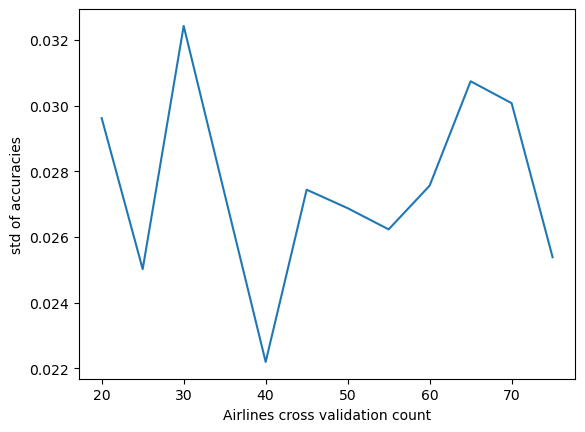

In [14]:
stds_plot = []
for n in range(20, 80, 5):
    stds_plot.append(stds[n])
plt.plot(range(20, 80, 5), stds_plot)
plt.xlabel("Airlines cross validation count")
plt.ylabel("std of accuracies")
plt.show()

In [ ]:
X_test_batches = []
y_test_batches = []

i = 0
while i < len(X_test):
    new_i = i + 17000
    if new_i > len(X_test):
        new_i = len(X_test)
    X_test_batches.append(X_test[i: new_i])
    y_test_batches.append(y_test[i: new_i])
    i = new_i

print(len(X_test_batches))
print(X_test_batches[0].shape)
print(y_test_batches[0].shape)
print(X_test_batches[-1].shape)
print(y_test_batches[-1].shape)

In [ ]:
accs = []
threshold = np.mean(cross_val_scores) - np.std(cross_val_scores)

model_knn = KNeighborsClassifier(n_neighbors=2066)
model_knn.fit(X_train, y_train.values.ravel())
for batch in range(len(X_test_batches)):
    batch_score = model_knn.score(X_test_batches[batch], y_test_batches[batch])
    print('\n', batch_score)
    if batch_score < threshold:
        print("drift in batch", batch + 1)
    accs.append(batch_score)

In [ ]:
print(threshold)
plt.bar(range(0, len(X_test_batches)), accs)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()